In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

C:\Users\hp\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import pyfiglet as pyf
print(pyf.figlet_format('Kelompok - 12'))
print(pyf.figlet_format('---------'))
print(pyf.figlet_format('RUMUSAN MASALAH'))


print('''
    1. Bagaimana minat pendaftar memilih universitas? 
       Universitas mana yang paling diminati dan yang kurang diminati?
    2. Bagaimana proporsi perbandingan peminat antara jenis jurusan (SAINTEK dan SOSHUM) di kalangan pendaftar?
    3. Bagaimana minat pendaftar terhadap berbagai program studi di suatu institusi perguruan tinggi?
       Jurusan apa yang paling diminati dan jurusan apa yang kurang diminati?
    4. Dari sekian banyak universitas, mengapa Universitas Brawijaya menjadi universitas dengan peminat paling banyak?
       Jurusan apa yang paling diminati di Universitas tersebut?
    5. Apakah terdapat tren peningkatan atau penurunan terhadap jumlah peminat di PTN (Perguruan Tinggi Negeri)?
    6. Bagaimana tren perbandingan antara jumlah peminat dan daya tampung pada program studi kedokteran di Universitas Brawijaya dari tahun 2017 hingga 2021? 
       Apakah terdapat peningkatan atau penurunan signifikan dalam jumlah peminat program studi tersebut di Universitas Brawijaya selama periode tersebut?
''')

print(pyf.figlet_format('-----------'))

 _  __    _                             _              _ ____  
| |/ /___| | ___  _ __ ___  _ __   ___ | | __         / |___ \ 
| ' // _ \ |/ _ \| '_ ` _ \| '_ \ / _ \| |/ /  _____  | | __) |
| . \  __/ | (_) | | | | | | |_) | (_) |   <  |_____| | |/ __/ 
|_|\_\___|_|\___/|_| |_| |_| .__/ \___/|_|\_\         |_|_____|
                           |_|                                 

                                                       
                                                       
 _____ _____ _____ _____ _____ _____ _____ _____ _____ 
|_____|_____|_____|_____|_____|_____|_____|_____|_____|
                                                       
                                                       

 ____  _   _ __  __ _   _ ____    _    _   _ 
|  _ \| | | |  \/  | | | / ___|  / \  | \ | |
| |_) | | | | |\/| | | | \___ \ / _ \ |  \| |
|  _ <| |_| | |  | | |_| |___) / ___ \| |\  |
|_| \_\\___/|_|  |_|\___/|____/_/   \_\_| \_|
                                             
 _

## Latar belakang: 
Dataset ini menyajikan informasi tentang jumlah peminat dan daya tampung universitas dari tahun 2017 hingga 2021. Dataset terbagi menjadi informasi jumlah peminat dan daya tampung, fokus pada perbandingan peminat dan daya tampung, identifikasi universitas yang paling diminati, serta distribusi jumlah peminat dan daya tampung pada program studi. Analisis terhadap data ini dapat memberikan pemahaman tentang pertumbuhan atau perubahan kapasitas universitas dari waktu ke waktu.

### DATASET:
https://github.com/talitharhmd/Exploratory-Data-Analysis/tree/3ec240d0b2a6501403fac2eba7cb8ecd4d38c096/PTN%20Indonesia_Dataset

### METADATA
- info_universitas: Informasi tentang universitas yang terdiri dari kode universitas dan nama universitas.
- nama_prodi: Nama dari program studi yang ditawarkan oleh perguruan tinggi
- jenis: Jenis program studi, misalnya SAINTEK atau SOSHUM.
- jumlah peminat_2017: Jumlah peminat pada tahun 2017 untuk program studi tersebut.
- jumlah peminat_2018: Jumlah peminat pada tahun 2018 untuk program studi tersebut.
- jumlah peminat_2019: Jumlah peminat pada tahun 2019 untuk program studi tersebut.
- jumlah peminat_2020: Jumlah peminat pada tahun 2020 untuk program studi tersebut.
- jumlah peminat_2021: Jumlah peminat pada tahun 2021 untuk program studi tersebut.
............................................................................................................................
- info_universitas: Informasi tentang universitas yang terdiri dari kode universitas dan nama universitas.
- daya tampung_2017: Kapasitas atau daya tampung universitas untuk tahun 2017.
- daya tampung_2018: Kapasitas atau daya tampung universitas untuk tahun 2018.
- daya tampung_2019: Kapasitas atau daya tampung universitas untuk tahun 2019.
- daya tampung_2020: Kapasitas atau daya tampung universitas untuk tahun 2020.
- daya tampung_2021: Kapasitas atau daya tampung universitas untuk tahun 2021.

In [8]:
df = pd.read_excel('https://github.com/talitharhmd/Exploratory-Data-Analysis/raw/main/PTN%20Indonesia_Dataset/Data%20Perguruan%20Tinggi%20Negeri%20di%20Indonesia.xlsx')
df = df.fillna(0)
df

,info_universitas,nama_prodi,jenis,jumlah peminat_2017,jumlah peminat_2018,jumlah peminat_2019,jumlah peminat_2020,jumlah peminat_2021
0,111_Universitas Syiah Kuala,KEDOKTERAN,SAINTEK,913,921,712,455,628
1,111_Universitas Syiah Kuala,TEKNIK SIPIL,SAINTEK,1686,1567,753,741,788
2,111_Universitas Syiah Kuala,TEKNIK MESIN,SAINTEK,648,621,292,338,264
3,111_Universitas Syiah Kuala,KIMIA,SAINTEK,371,322,296,201,156
4,111_Universitas Syiah Kuala,ARSITEKTUR,SAINTEK,809,761,487,410,417
...,...,...,...,...,...,...,...,...
3152,921_Universitas Papua,EKONOMI,SOSHUM,96,63,24,15,17
3153,921_Universitas Papua,MANAJEMEN,SOSHUM,150,110,45,26,45
3154,921_Universitas Papua,AKUNTANSI,SOSHUM,148,91,18,22,39
3155,921_Universitas Papua,BAHASA DAN SASTRA INDONESIA,SOSHUM,66,44,13,5,6


In [9]:
df1 = pd.read_excel('https://github.com/talitharhmd/Exploratory-Data-Analysis/raw/main/PTN%20Indonesia_Dataset/Data%20Daya%20Tampung%20SNBT%20PTN%20di%20Indonesia.xlsx')
df1 = df1.fillna(0)
df1

,info_universitas,daya tampung_2017,daya tampung_2018,daya tampung_2019,daya tampung_2020,daya tampung_2021
0,111_Universitas Syiah Kuala,88.0,96.0,91,109,103
1,111_Universitas Syiah Kuala,64.0,62.0,66,82,81
2,111_Universitas Syiah Kuala,48.0,48.0,53,69,71
3,111_Universitas Syiah Kuala,48.0,47.0,49,69,64
4,111_Universitas Syiah Kuala,48.0,44.0,49,69,63
...,...,...,...,...,...,...
3152,921_Universitas Papua,22.0,44.0,32,51,51
3153,921_Universitas Papua,21.0,50.0,32,44,44
3154,921_Universitas Papua,24.0,43.0,32,49,49
3155,921_Universitas Papua,20.0,26.0,16,28,28


In [10]:
# Melt DataFrame untuk mengubah menjadi format tidy
tidy = pd.melt(df, id_vars=['info_universitas','nama_prodi', 'jenis'], var_name='Jumlah Peminat', value_name='jumlah_peminat')

# Memisahkan Kolom Info Universitas menjadi kolom baru, yaitu kode univ dan nama universitas
tidy[['kode_univ', 'nama_universitas']] = tidy['info_universitas'].str.split('_', expand=True)

# Memisahkan Kolom Jumlah Peminat menjadi kolom baru, yaitu peminat dan tahun
tidy[['peminat', 'tahun']] = tidy['Jumlah Peminat'].str.split('_', expand=True)

# Menghapus Kolom yang tidak dibutuhkan, agar datanya semakin mudah untuk dipahami
tidy = tidy.drop(['info_universitas', 'peminat', 'Jumlah Peminat'], axis=1)

# Mengganti Urutan Kolom data agar lebih dipahami
tidy = tidy[['kode_univ', 'nama_universitas', 'nama_prodi', 'jenis', 'tahun', 'jumlah_peminat']]
tidy

,kode_univ,nama_universitas,nama_prodi,jenis,tahun,jumlah_peminat
0,111,Universitas Syiah Kuala,KEDOKTERAN,SAINTEK,2017,913
1,111,Universitas Syiah Kuala,TEKNIK SIPIL,SAINTEK,2017,1686
2,111,Universitas Syiah Kuala,TEKNIK MESIN,SAINTEK,2017,648
3,111,Universitas Syiah Kuala,KIMIA,SAINTEK,2017,371
4,111,Universitas Syiah Kuala,ARSITEKTUR,SAINTEK,2017,809
...,...,...,...,...,...,...
15780,921,Universitas Papua,EKONOMI,SOSHUM,2021,17
15781,921,Universitas Papua,MANAJEMEN,SOSHUM,2021,45
15782,921,Universitas Papua,AKUNTANSI,SOSHUM,2021,39
15783,921,Universitas Papua,BAHASA DAN SASTRA INDONESIA,SOSHUM,2021,6


In [6]:
# Melt DataFrame untuk mengubah menjadi format tidy
tidy1 = pd.melt(df1, id_vars=['info_universitas'], var_name='Daya Tampung', value_name='jumlah_daya_tampung')

# Memisahkan Kolom Info Universitas menjadi kolom baru, yaitu kode univ dan nama universitas
tidy1[['kode_univ', 'nama_universitas']] = tidy1['info_universitas'].str.split('_', expand=True)

# Memisahkan Kolom Jumlah Peminat menjadi kolom baru, yaitu peminat dan tahun
tidy1[['dayatampung', 'tahun']] = tidy1['Daya Tampung'].str.split('_', expand=True)

# Menghapus Kolom yang tidak dibutuhkan, agar datanya semakin mudah untuk dipahami
tidy1 = tidy1.drop(['info_universitas', 'dayatampung', 'Daya Tampung'], axis=1)

# Mengganti Urutan Kolom data agar lebih dipahami
tidy1 = tidy1[['kode_univ', 'nama_universitas', 'tahun', 'jumlah_daya_tampung']]
tidy1

,kode_univ,nama_universitas,tahun,jumlah_daya_tampung
0,111,Universitas Syiah Kuala,2017,88.0
1,111,Universitas Syiah Kuala,2017,64.0
2,111,Universitas Syiah Kuala,2017,48.0
3,111,Universitas Syiah Kuala,2017,48.0
4,111,Universitas Syiah Kuala,2017,48.0
...,...,...,...,...
15780,921,Universitas Papua,2021,51.0
15781,921,Universitas Papua,2021,44.0
15782,921,Universitas Papua,2021,49.0
15783,921,Universitas Papua,2021,28.0


In [7]:
# Menggabungkan Kedua data dengan memakai Concat Karena memiliki rows dan beberapa kolom yang sama
data = pd.concat([tidy, tidy1['jumlah_daya_tampung']], axis=1)
data

,kode_univ,nama_universitas,nama_prodi,jenis,tahun,jumlah_peminat,jumlah_daya_tampung
0,111,Universitas Syiah Kuala,KEDOKTERAN,SAINTEK,2017,913,88.0
1,111,Universitas Syiah Kuala,TEKNIK SIPIL,SAINTEK,2017,1686,64.0
2,111,Universitas Syiah Kuala,TEKNIK MESIN,SAINTEK,2017,648,48.0
3,111,Universitas Syiah Kuala,KIMIA,SAINTEK,2017,371,48.0
4,111,Universitas Syiah Kuala,ARSITEKTUR,SAINTEK,2017,809,48.0
...,...,...,...,...,...,...,...
15780,921,Universitas Papua,EKONOMI,SOSHUM,2021,17,51.0
15781,921,Universitas Papua,MANAJEMEN,SOSHUM,2021,45,44.0
15782,921,Universitas Papua,AKUNTANSI,SOSHUM,2021,39,49.0
15783,921,Universitas Papua,BAHASA DAN SASTRA INDONESIA,SOSHUM,2021,6,28.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15785 entries, 0 to 15784
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   kode_univ            15785 non-null  object 
 1   nama_universitas     15785 non-null  object 
 2   nama_prodi           15785 non-null  object 
 3   jenis                15785 non-null  object 
 4   tahun                15785 non-null  object 
 5   jumlah_peminat       15785 non-null  int64  
 6   jumlah_daya_tampung  15785 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 863.4+ KB


In [9]:
data['kode_univ'] = data['kode_univ'].astype(int)
#data['tahun'] = data['tahun'].astype(int)
data['jumlah_daya_tampung'] = data['jumlah_daya_tampung'].astype(int)
data

,kode_univ,nama_universitas,nama_prodi,jenis,tahun,jumlah_peminat,jumlah_daya_tampung
0,111,Universitas Syiah Kuala,KEDOKTERAN,SAINTEK,2017,913,88
1,111,Universitas Syiah Kuala,TEKNIK SIPIL,SAINTEK,2017,1686,64
2,111,Universitas Syiah Kuala,TEKNIK MESIN,SAINTEK,2017,648,48
3,111,Universitas Syiah Kuala,KIMIA,SAINTEK,2017,371,48
4,111,Universitas Syiah Kuala,ARSITEKTUR,SAINTEK,2017,809,48
...,...,...,...,...,...,...,...
15780,921,Universitas Papua,EKONOMI,SOSHUM,2021,17,51
15781,921,Universitas Papua,MANAJEMEN,SOSHUM,2021,45,44
15782,921,Universitas Papua,AKUNTANSI,SOSHUM,2021,39,49
15783,921,Universitas Papua,BAHASA DAN SASTRA INDONESIA,SOSHUM,2021,6,28


In [10]:
data = data.drop_duplicates()
data

,kode_univ,nama_universitas,nama_prodi,jenis,tahun,jumlah_peminat,jumlah_daya_tampung
0,111,Universitas Syiah Kuala,KEDOKTERAN,SAINTEK,2017,913,88
1,111,Universitas Syiah Kuala,TEKNIK SIPIL,SAINTEK,2017,1686,64
2,111,Universitas Syiah Kuala,TEKNIK MESIN,SAINTEK,2017,648,48
3,111,Universitas Syiah Kuala,KIMIA,SAINTEK,2017,371,48
4,111,Universitas Syiah Kuala,ARSITEKTUR,SAINTEK,2017,809,48
...,...,...,...,...,...,...,...
15780,921,Universitas Papua,EKONOMI,SOSHUM,2021,17,51
15781,921,Universitas Papua,MANAJEMEN,SOSHUM,2021,45,44
15782,921,Universitas Papua,AKUNTANSI,SOSHUM,2021,39,49
15783,921,Universitas Papua,BAHASA DAN SASTRA INDONESIA,SOSHUM,2021,6,28


# 1. Bagaimana minat pendaftar dalam memilih Universitas? Universitas mana yang paling diminati dan yang kurang diminati?

In [11]:
data = data.copy()
data

,kode_univ,nama_universitas,nama_prodi,jenis,tahun,jumlah_peminat,jumlah_daya_tampung
0,111,Universitas Syiah Kuala,KEDOKTERAN,SAINTEK,2017,913,88
1,111,Universitas Syiah Kuala,TEKNIK SIPIL,SAINTEK,2017,1686,64
2,111,Universitas Syiah Kuala,TEKNIK MESIN,SAINTEK,2017,648,48
3,111,Universitas Syiah Kuala,KIMIA,SAINTEK,2017,371,48
4,111,Universitas Syiah Kuala,ARSITEKTUR,SAINTEK,2017,809,48
...,...,...,...,...,...,...,...
15780,921,Universitas Papua,EKONOMI,SOSHUM,2021,17,51
15781,921,Universitas Papua,MANAJEMEN,SOSHUM,2021,45,44
15782,921,Universitas Papua,AKUNTANSI,SOSHUM,2021,39,49
15783,921,Universitas Papua,BAHASA DAN SASTRA INDONESIA,SOSHUM,2021,6,28


In [12]:
# Groupby universitas dan menghitung jumlah peminat untuk setiap universitas
teratas = data.groupby(['nama_universitas'])['jumlah_peminat'].sum().reset_index()
teratas = teratas.sort_values(by='jumlah_peminat', ascending=False).reset_index().head(5)
teratas.drop(['index'], axis=1)

,nama_universitas,jumlah_peminat
0,Universitas Brawijaya,378415
1,Universitas Padjajaran,362239
2,Universitas Indonesia,321116
3,UIN Raden Mas Said Surakarta,318846
4,Universitas Sebelas Maret,318174


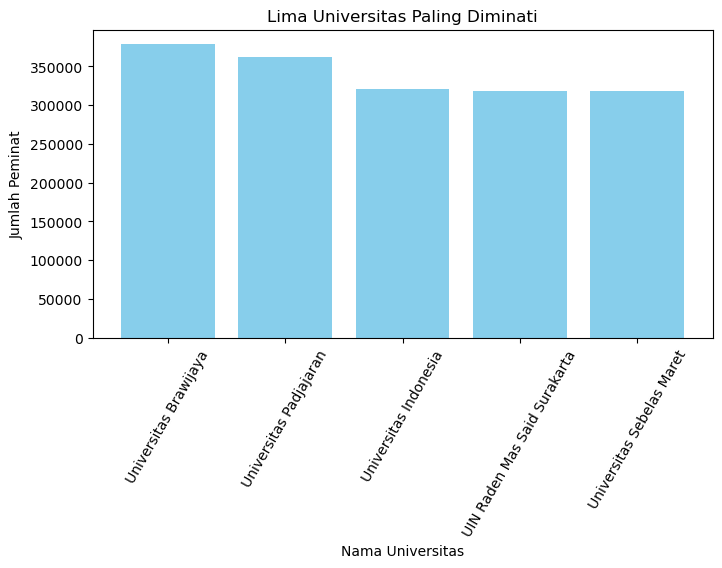

In [13]:
# Visualisasi dengan diagram batang
plt.figure(figsize=(8, 4))
plt.bar(teratas['nama_universitas'], teratas['jumlah_peminat'], color='skyblue')
plt.xlabel('Nama Universitas')
plt.ylabel('Jumlah Peminat')
plt.title('Lima Universitas Paling Diminati')
plt.xticks(rotation=60)
plt.show()

In [14]:
# Groupby universitas dan menghitung jumlah peminat untuk setiap universitas
terbawah = data.groupby(['nama_universitas'])['jumlah_peminat'].sum().reset_index()
terbawah = terbawah.sort_values(by='jumlah_peminat', ascending=False).reset_index().tail(5)
terbawah.drop(['index'], axis=1)

,nama_universitas,jumlah_peminat
80,ISI Padang Panjang,3851
81,Universitas Papua,3421
82,ISI Denpasar,2902
83,ISBI ACEH,322
84,ISBI Tanah Papua,40


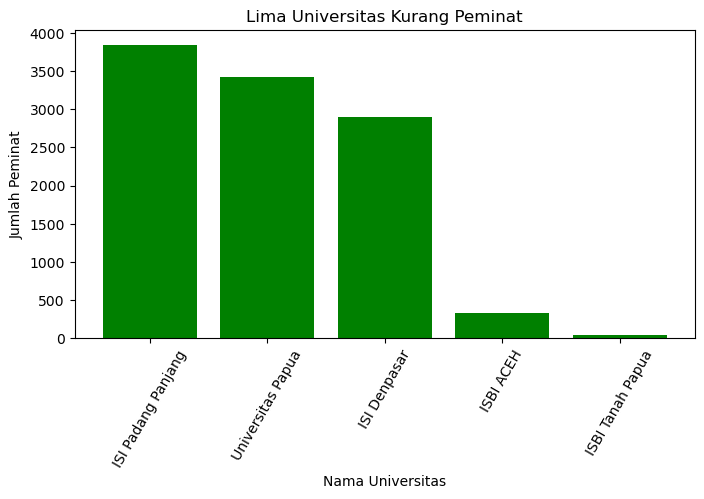

In [15]:
# Visualisasi dengan diagram batang
plt.figure(figsize=(8, 4))
plt.bar(terbawah['nama_universitas'], terbawah['jumlah_peminat'], color='green')
plt.xlabel('Nama Universitas')
plt.ylabel('Jumlah Peminat')
plt.title('Lima Universitas Kurang Peminat')
plt.xticks(rotation=60)
plt.show()

Kesimpulan :
- 5 Universitas dengan peminat yang paling banyak adalah:
1. Universitas Brawijaya
2. Universitas Padjajaran
3. Universitas Indonesia
4. UIN Raden Mas Said Surakarta
5. Universitas Sebelas Maret

- 5 Universitas yang kurang diminati adalah:
1. ISI Padang Panjang
2. Universitas Papua
3. ISI Denpasar
4. ISBI Aceh
5. ISBI Tanah Papua

- Ada beberapa faktor yang menjadikan universitas tersebut menjadi Universitas dengan peminat paling banyak:
1. Universitas tersebut memiliki reputasi yang baik di Indonesia.
2. Universitas tersebut memiliki akreditasi A dari Badan Akreditasi Nasional Perguruan Tinggi (BAN-PT), memiliki alumni yang sukses, dan memiliki fasilitas yang memadai.
3. Universitas dengan peminat paling banyak ternyata rata-rata berada di Pulau Jawa yang mana Pulau Jawa adalah Pusat Ekonomi dan Industri, dan biaya hidup serta pendidikannya relatif terjangkau.

# 2. Bagaimana proporsi perbandingan peminat antara jenis jurusan Saintek dan Soshum di kalangan Pendaftar?

In [16]:
# Groupby Jenis (SAINTEK dan SOSHUM) dan menghitung jumlah peminat di setiap jenis jurusan
total_peminat_per_jenis = data.groupby('jenis')['jumlah_peminat'].sum()
total_peminat_per_jenis

jenis
SAINTEK    4352973
SOSHUM     4670903
Name: jumlah_peminat, dtype: int64

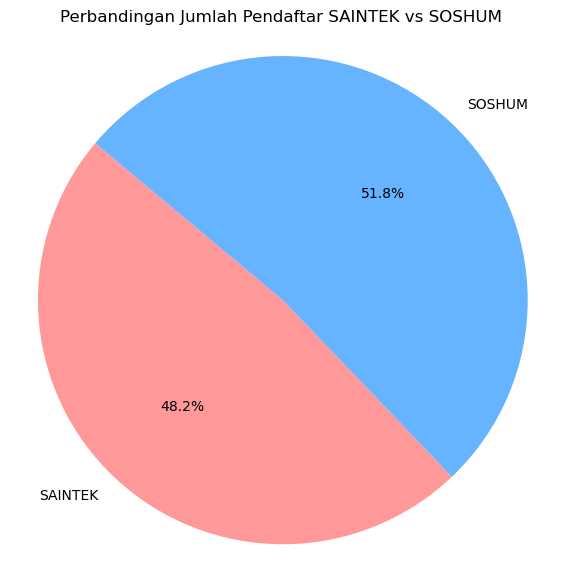

In [17]:
# Visualisasi menggunakan pie chart
labels = total_peminat_per_jenis.index.tolist()  # Mendapatkan label dari indeks
sizes = total_peminat_per_jenis.values.tolist()  # Mendapatkan nilai jumlah peminat
colors = ['#ff9999', '#66b3ff']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Perbandingan Jumlah Pendaftar SAINTEK vs SOSHUM')
plt.axis('equal')  # Mengatur pie chart menjadi lingkaran
plt.show()

Kesimpulan : Para ndaftar lebih memilih soshum dibanding saintek, hal itu berdasarkan peminatan mereka terhadap jurusan soshum yang lebih tinggi dibanding saintek. Mungkin ada beberapa alasan mengapa mereka lebih memilih soshum dibanding saintek, yaitu:
1. Pilihan minat serta bakat dari individu masing-masing
2. Jurusan Soshum dianggap lebih mudah untuk lulus dibandingkan dengan jurusan saintek
3. Jurusan Soshum memiliki beban studi yang lebih ringan dan lebih mudah dipahami dibandingkan jurusan-jurusan saintek yang terus bergelud dengan angka
4. Jurusan Soshum memiliki prospek kerja yang baik, terutama di bidang bisnis, pemerintahan, dan hukum.

# 3. Bagaimana minat pendaftar terhadap berbagai program studi di suatu institusi perguruan tinggi? Jurusan apa yang paling diminati dan jurusan apa yang kurang diminati?

In [18]:
prodi = data.groupby('nama_prodi')['jumlah_peminat'].sum().reset_index()
prodi = prodi.sort_values(by='jumlah_peminat', ascending=False).reset_index().head(5)
prodi.drop(['index'],axis=1)

,nama_prodi,jumlah_peminat
0,MANAJEMEN,655899
1,KEDOKTERAN,403697
2,HUKUM,388844
3,AKUNTANSI,356712
4,ILMU KOMUNIKASI,314506


In [19]:
prodi = data.groupby('nama_prodi')['jumlah_peminat'].sum().reset_index()
prodi = prodi.sort_values(by='jumlah_peminat', ascending=False).reset_index().tail(5)
prodi.drop(['index'],axis=1)

,nama_prodi,jumlah_peminat
125,TEKNIK NUKLIR,2172
126,BAHASA DAN SASTRA BELANDA,2023
127,PENDIDIKAN ARSITEKTUR,1828
128,TEKNIK PEMBANGUNAN,857
129,PENDIDIKAN KELAUTAN,608


Kesimpulan: 
- Jurusan yang paling banyak diminati oleh para calon mahasiswa adalah Jurusan Manajemen, Kedokteran, Hukum, Akuntansi, dan Ilmu Komunikasi
- Jurusan yang kurang diminati oleh para calon mahasiswa adalah Teknik Nuklir, Bahasa dan Sastra Belanda, Pendidikan Arsitektur, Teknik Pembangunan, dan Pendidikan Kelautan

- Jurusan tersebut mungkin lebih diminati karena beberapa hal:
1. Prospek kerja yang cerah dan luas.
2. Minat dan Bakat para pendaftar
3. Pengaruh Media, Iklan ataupun Promosi terkait jurusan tersebut
4. Jurusan tersebut banyak dibuka / lebih terbuka di berbagai Perguruan Tinggi.

# 4. Mengapa Universitas Brawijaya menjadi universitas dengan peminat paling banyak dibanding universitas lain? Jurusan apa yang paling banyak diminati di Universitas Brawijaya? Apakah ada faktor luar yang mempengaruhi?

In [21]:
# Groupby universitas dan menghitung jumlah peminat untuk setiap universitas
univ = data.groupby(['nama_universitas'])['jumlah_peminat', 'jumlah_daya_tampung'].sum().reset_index()
univ = univ.sort_values(by='jumlah_peminat', ascending=False).reset_index()
univ['jumlah_daya_tampung'] = univ['jumlah_daya_tampung'].astype(int)
univ.drop(['index'], axis=1)

,nama_universitas,jumlah_peminat,jumlah_daya_tampung
0,Universitas Brawijaya,378415,25933
1,Universitas Padjajaran,362239,15499
2,Universitas Indonesia,321116,12701
3,UIN Raden Mas Said Surakarta,318846,13542
4,Universitas Sebelas Maret,318174,15781
...,...,...,...
80,ISI Padang Panjang,3851,2326
81,Universitas Papua,3421,4186
82,ISI Denpasar,2902,1213
83,ISBI ACEH,322,744


In [22]:
total_jurusan = data.pivot_table(index=['nama_universitas'], values='nama_prodi', aggfunc='count').div(5)
total_jurusan = total_jurusan.sort_values(by='nama_prodi', ascending=False)
total_jurusan['nama_prodi'] = total_jurusan['nama_prodi'].astype(int)
total_jurusan.head(5)

,nama_prodi
nama_universitas,
Universitas Pendidikan Indonesia,81
Universitas Brawijaya,75
Universitas Haluoleo,74
Universitas Negeri Semarang,69
Universitas Negeri Makassar,68


In [23]:
df_univ_brawijaya = data[data['nama_universitas'] == 'Universitas Brawijaya']
group_df_univ_brawijaya = df_univ_brawijaya.groupby('nama_prodi')['jumlah_peminat', 'jumlah_daya_tampung'].sum().reset_index()
ub = group_df_univ_brawijaya.sort_values(by='jumlah_peminat', ascending=False).reset_index()
ub.drop(['index'], axis=1).head(5)

,nama_prodi,jumlah_peminat,jumlah_daya_tampung
0,KEDOKTERAN,26024,1114
1,ADMINISTRASI,22642,1591
2,HUKUM,18351,1232
3,MANAJEMEN,15805,874
4,INFORMATIKA,14994,714


Kesimpulan : Universitas Brawijaya menjadi Universitas yang paling banyak diminati oleh para pendaftar, dikarenakan beberapa faktor:
1. Kesesuaian antara Daya Tampung dan Jumlah Peminat, Universitas Brawijaya menjadi Universitas dengan Daya Tampung yang banyak dibanding universitas lain, sehingga para pendaftar lebih tertarik dan lebih memilih Universitas Brawijaya karena daya tampung yang banyak
2. Keberagaman Jenis Program Studi, Universitas Brawijaya menjadi Salah satu Universitas dengan Jumlah Program Studi yang beragam dibandigkan dengan PTN lain. Dan itu menjadi salah satu faktor untuk menarik minat pendaftar untuk memilih Program Studi di Universitas Brawijaya
3. Reputasi, Akreditasi, Lulusan, dan Nama Baik Universitas. Dimana ini juga menjadi Salah satu faktor para pendaftar lebih memilih untuk mendaftar di Universitas Brawijaya.
4. Program Studi. Karena program studi yang beragam, Universitas Brawijaya menjadi Universitas yang Paling banyak diminati oleh pendaftar, dimana itu terdapat pada 3 Program Studi, yaitu Kedokteran, Hukum, dan Manajemen. Dimana tiga program studi tersebut termasuk Top 5 Program Studi PTN yang paling diminati oleh para pendaftar

# 5. Apakah terdapat tren peningkatan atau penurunan terhadap jumlah peminat di PTN ?

In [24]:
# Menghitung total peminat per tahun
total_peminat_per_tahun = data.groupby('tahun')['jumlah_peminat'].sum()
total_peminat_per_tahun.to_frame()

,jumlah_peminat
tahun,
2017,2298992
2018,2494798
2019,1411285
2020,1371861
2021,1446940


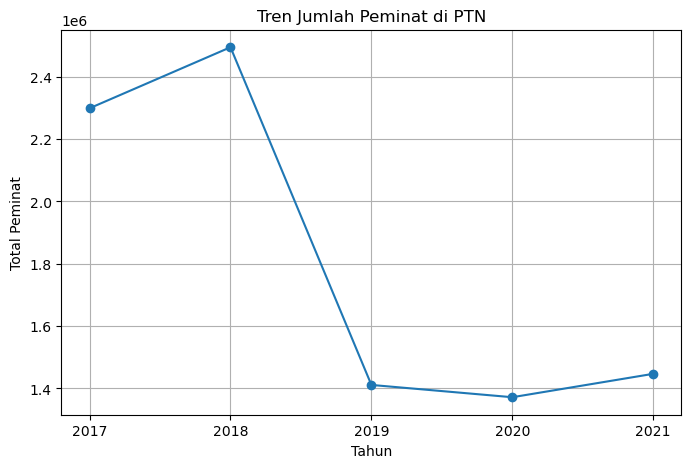

In [25]:
# Visualisasi dengan grafik garis
plt.figure(figsize=(8, 5))
plt.plot(total_peminat_per_tahun.index, total_peminat_per_tahun.values, marker='o', linestyle='-')
plt.xlabel('Tahun')
plt.ylabel('Total Peminat')
plt.title('Tren Jumlah Peminat di PTN')
plt.grid(True)
plt.show()

Kesimpulan : Terdapat tren kenaikan dan penurunan Jumlah Peminat di PTN, dimana jumlah peminat PTN di Tahun 2017 ke 2018 terdapat peningkatan dan menurun drastis di tahun 2019. Dan Jumlah Peminat di PTN juga menurun di tahun 2020. Dan bertambah lagi pada tahun 2021.
- Terjadinya tren kenaikan dan penurunan jumlah peminat di PTN mungkin karena beberapa faktor:
1. Kebijakan Pemerintah terkait Pengetatan Jalur Masuk PTN di Indonesia (baik itu SNMPTN atau SBMPTN)
2. Meningkatnya jumlah Perguruan Tinggi Swasta (PTS) yang membuat para pendaftar lebih memilih PTS dibanding PTN karena disebabkan kebijakan pemerintah yang mengetatkan jalur masuk PTN
3. Kurangnya minat para pendaftar untuk melanjutkan ke jenjang Perguruan Tinggi, dan lebih memilih langsung kerja.
4. Adanya Pandemi Covid-19 yang sempat merajalela dan sempat menyebabkan ketidakpastian ekonomi di Indonesia, sehingga sebagian para orang tua dari pendaftar memikirkan ulang untuk mendaftarkan anaknya di perguruan tinggi.


- Bukti yang mendukung adanya kenaikan dan penurunan jumlah peminat di PTN:
1. Dilansir dari Badan Pusat Statistik (BPS), pada tahun 2019, persentase lulusan SMA yang melanjutkan pendidikan ke perguruan tinggi sebesar 37,9%. Angka ini lebih tinggi dibandingkan persentase lulusan SMA yang melanjutkan pendidikan ke perguruan tinggi pada tahun 2018, yaitu sebesar 40,4%.
2. Data dari Kementrian Pendidikan dan Kebudayaan (Kemendikbud), pada tahun 2019, jumlah lulusan SMA yang bekerja langsung setelah lulus sebesar 25,8%. Angka ini lebih tinggi dibandingkan jumlah lulusan SMA yang bekerja langsung setelah lulus pada tahun 2018, yaitu sebesar 23,3%.

# 6. Bagaimana tren perbandingan jumlah peminat dan daya tampung pada program studi kedokteran di Universitas Brawijaya? Apakah terdapat peningkatan atau penurunan signifikan dalam jumlah peminat program studi tersebut?

In [26]:
df_univ_brawijaya = data[data['nama_universitas'] == 'Universitas Brawijaya']
kedokteran = df_univ_brawijaya[(df_univ_brawijaya['nama_prodi'] == 'KEDOKTERAN')]

# Filter data hanya untuk tahun 2017-2021
kedokteran = kedokteran[(kedokteran['tahun'] >= '2017') & (kedokteran['tahun'] <= '2021')]

# Pisahkan data menjadi jumlah peminat dan daya tampung
jumlah_peminat = kedokteran.groupby('tahun')['jumlah_peminat'].sum().reset_index()
daya_tampung = kedokteran.groupby('tahun')['jumlah_daya_tampung'].sum().reset_index()
gabung = pd.concat([jumlah_peminat, daya_tampung['jumlah_daya_tampung']], axis=1)
gabung

In [46]:
gabung = pd.concat([jumlah_peminat, daya_tampung['jumlah_daya_tampung']], axis=1)
gabung

,tahun,jumlah_peminat,jumlah_daya_tampung
0,2017,6000,200
1,2018,7204,219
2,2019,2795,220
3,2020,4551,232
4,2021,5474,243


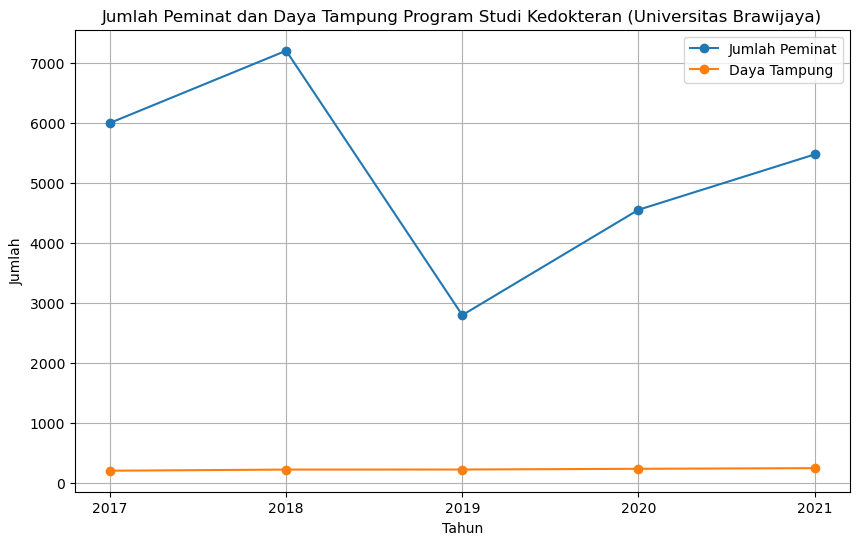

In [44]:
# Plot garis untuk jumlah peminat
plt.figure(figsize=(10, 6))
plt.plot(gabung['tahun'], gabung['jumlah_peminat'], marker='o', label='Jumlah Peminat')

# Plot garis untuk daya tampung
plt.plot(gabung['tahun'], gabung['jumlah_daya_tampung'], marker='o', label='Daya Tampung')

plt.title('Jumlah Peminat dan Daya Tampung Program Studi Kedokteran (Universitas Brawijaya)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.legend()
plt.grid(True)
plt.show()

Kesimpulan : Pada program studi kedokteran di Universitas Brawijaya, Tren pada jumlah peminat mengalami kenaikan di tahun 2018 dan mengalami penurunan yang drastis pada tahun 2019. Hingga akhirnya pada tahun 2020, jumlah peminat semakin meningkat, begitupun pada tahun 2021.
- Adapun mengapa bisa terjadi kenaikan atau penurunan jumlah peminat dikarenakan beberapa hal:
1. Kebijakan Pemerintah terkait Pengetatan Jalur Masuk PTN di Indonesia (baik itu SNMPTN atau SBMPTN), sehingga para pendaftar memikir ulang untuk mencoba mendaftar Program Studi Kedokteran di Universitas Brawijaya
2. Meningkatnya jumlah Perguruan Tinggi Swasta (PTS) yang membuat para pendaftar lebih memilih PTS dibanding PTN karena disebabkan kebijakan pemerintah yang mengetatkan jalur masuk PTN

# Kesimpulan dan Saran

Kesimpulan :
1. Universitas Brawijaya, Universitas Padjajaran, dan Universitas Indonesia paling diminati.
2. Pendaftar cenderung lebih memilih jurusan SOSHUM daripada SAINTEK.
3. Jurusan Kedokteran, Hukum, Manajemen, Akuntansi, dan Ilmu Komunikasi.
4. Universitas Brawijaya diminati karena daya tampung besar, keberagaman program studi, dan reputasi baik.
5. Terdapat tren fluktuasi jumlah peminat, mungkin dipengaruhi oleh kebijakan pemerintah dan dampak pandemi.
6. Program Studi Kedokteran mengalami pertumbuhan baik pada jumlah peminat maupun daya tampung.

Saran :
1. Mengevaluasi dan melakukan strategi pemasaran ataupun promosi pada Universitas yang kurang diminati.
2. Melakukan strategi untuk meningkatkan minat pada jurusan SAINTEK.
3. Selalu mengevaluasi dan memperkuat strategi pemasaran atau promosi terhadap program studi kurang diminati.
4. Melakukan pemantauan terus-menerus dan respons terhadap faktor eksternal penting universitas, yang nantinya akan berpengaruh terhadap reputasi dan akreditasi universitas
5. Mengadaptasi strategi pemasaran dan pemantauan kebijakan pemerintah.
6. Melakukan pemantauan dan penyesuaian daya tampung yang sebanding dengan jumlah peminat.